In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#тюнит параметры с помощью кросс-валидации
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

import math

from sklearn.neighbors import KNeighborsClassifier

from scipy.sparse import csr_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
from IPython.display import HTML
style = "<style>svg{width:90% !important; height:90% !important;}</style>"
HTML(style)

In [3]:
conversion_rates = pd.read_csv("data/conversionRates.csv")

In [4]:
free_form_responses = pd.read_csv("data/freeformResponses.csv", low_memory=False)

In [3]:
import codecs
with codecs.open("data/multipleChoiceResponses.csv", 'r', encoding='utf-8',
                 errors='ignore') as fdata:
    data = pd.read_csv(fdata)

/home/tanya/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pd.unique(data['EmploymentStatus'])
pd.unique(data['CurrentJobTitleSelect'])

array(['DBA/Database Engineer', nan, 'Operations Research Practitioner',
       'Computer Scientist', 'Data Scientist',
       'Software Developer/Software Engineer', 'Business Analyst',
       'Engineer', 'Scientist/Researcher', 'Researcher', 'Other',
       'Data Analyst', 'Machine Learning Engineer', 'Statistician',
       'Predictive Modeler', 'Programmer', 'Data Miner'], dtype=object)

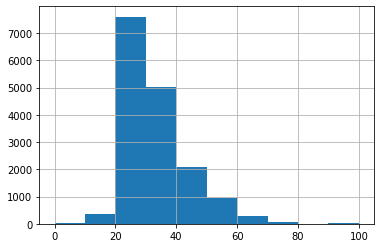

In [47]:
data['Age'].hist()

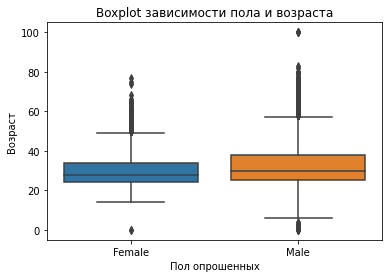

In [48]:
sns.boxplot(x=data[data["GenderSelect"].isin(["Male", "Female"])]["GenderSelect"], y="Age", data=data)
plt.xlabel("Пол опрошенных");
plt.ylabel("Возраст");
plt.title("Boxplot зависимости пола и возраста");

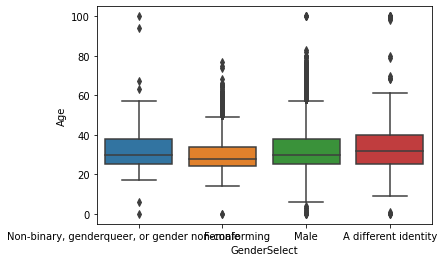

In [49]:
sns.boxplot(x=data["GenderSelect"], y="Age", data=data)

In [23]:
data['EmploymentStatus'].fillna("NaN").value_counts()

Employed full-time                                      10897
Not employed, but looking for work                       2110
Independent contractor, freelancer, or self-employed     1330
Not employed, and not looking for work                    924
Employed part-time                                        917
I prefer not to say                                       420
Retired                                                   118
Name: EmploymentStatus, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 229 entries, GenderSelect to gender
dtypes: bool(1), float64(13), object(215)
memory usage: 29.1+ MB


In [19]:
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,gender
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,True
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,True
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [7]:
pd.unique(data['GenderSelect'])

array(['Non-binary, genderqueer, or gender non-conforming', 'Female',
       'Male', 'A different identity', nan], dtype=object)

### Проранжируем имеющиеся варианты ответов в данных, чтобы обработать их

*GenderSelect*
* Male - 0
* Female - 1

*EmploymentStatus* - занятость
* Not employed, but looking for work - 0
* Employed full-time - 1
* Independent contractor, freelancer, or self-employed - 2
* Not employed, and not looking for work - 3
* Employed part-time - 4
* Retired - 5
* I prefer not to say - 6

*StudentStatus*
* Yes - 1
* No - 0

*LearningDataScience*
* No, I am not focused on learning data science skills - 0
* Yes, but data science is a small part of what I'm focused on learning - 1
* Yes, I'm focused on learning mostly data science skills - 2

*CodeWriter*
* Yes - 1
* No - 0

*CareerSwitcher* -  желание смены текущей кареьры на карьеру в data science
* Yes - 1
* No - 0

???? на подумоть
*CurrentJobTitleSelect*
DBA/Database Engineer
Operations Research Practitioner
Computer Scientist
Data Scientist',
Software Developer/Software Engineer
Business Analyst
Engineer
Scientist/Researcher
Researcher
Other
Data Analyst
Machine Learning Engineer
Statistician
Predictive Modeler
Programmer
Data Miner

*FormalEducation* - уровень образования
* Bachelor's degree
* Master's degree
* Doctoral degree
* Some college/university study without earning a bachelor's degree
* I did not complete any formal education past high school
* Professional degree', 'I prefer not to answer

*MLMethodNextYearSelect* - самый интересующий метод DS для изучения в следующем году
*MLToolNextYearSelect* - самый интересующий иструмент DS или технология для изучения в следующем году

*LanguageRecommendationSelect* - какой язык программирования вы бы порекомендовали изучать новичкам в первую очередь ['F#', 'Python', 'R', 'SQL', nan, 'Java', 'Matlab', 'C/C++/C#',
       'SAS', 'Stata', 'Other', 'Julia', 'Scala', 'Haskell']
*PublicDatasetsSelect* - откуда вы берте публичные датасеты для практики навыков работы с данными
*LearningPlatformSelect* - платформы и ресурсы вы использовали для обучения DS

Насколько полезны эти платформы и ресурсы для обучения навыкам работы с данными?  
*LearningPlatformUsefulnessBlogs* - блоги  
*LearningPlatformUsefulnessCollege* - колледж/университет  
*LearningPlatformUsefulnessCompany* - обучение внутри компании  
*LearningPlatformUsefulnessConferences* - конференции  
*LearningPlatformUsefulnessFriends* - окружение единомышленников-друзей  
*LearningPlatformUsefulnessKaggle* - ресурс Kaggle  
*LearningPlatformUsefulnessCommunities* - онлайн-сообщества  
*LearningPlatformUsefulnessDocumentation* - документация  
*LearningPlatformUsefulnessCourses* - онлайн курсы  
*LearningPlatformUsefulnessProjects* - персональные проекты  
*LearningPlatformUsefulnessPodcasts* - подкасты  
*LearningPlatformUsefulnessSO* - Stack Overflow Q&A  
*LearningPlatformUsefulnessTextbook* - учебники  
*LearningPlatformUsefulnessTutoring* - репетиторство  
*LearningPlatformUsefulnessYouTube* - YouTube видео  
* Not Useful - 0
* Somewhat useful - 1
* Very useful - 2

*LearningDataScienceTime* - как долго вы изучаете DS
* 1-2 years
* < 1 year
* 3-5 years
* 15+ years
* 5-10 years
* 10-15 years

Как вы думаете, насколько важны перечисленные ниже навыки или сертификаты для получения работы в области DS?  
*JobSkillImportanceBigData* - 'Big Data' technology  
*JobSkillImportanceDegree* - Ученая степень в смежных областях  
*JobSkillImportanceStats* - Продвинутый уровень статистики  
*JobSkillImportanceEnterpriseTools* - Инструменты для корпоративной разработки (например, SAS)  
*JobSkillImportancePython* - свободное владение Python  
*JobSkillImportanceR* - свободное владение R  
*JobSkillImportanceSQL* - свободное владение SQL  
*JobSkillImportanceMOOC* - онлайн сертификация или MOOC  
*JobSkillImportanceVisualizations* - инструменты визуализации  
* Unnecessary - 0
* Nice to have - 1
* Necessary - 2

*HardwarePersonalProjectsSelect* - Какое компьютерное оборудование вы используете для своих личных проектов ML / DS?

*TimeSpentStudying* - В среднем, сколько часов в неделю вы тратите на изучение DS?
* 0 - 1 hour
* 2 - 10 hours
* 11 - 39 hours
* 40+

*ProveKnowledgeSelect* - Что может продемонстрировать ваши знания ML/DS
* Master's degree
* Github Portfolio
* Kaggle Competitions',
* Online Courses and Certifications
* PhD
* Experience from work in a company related to ML
* Other

*WorkAlgorithmsSelect* - Какие алгоритмы / аналитические методы вы обычно используете на работе

Какие инструменты, технологии и языки науки о данных / аналитики вы использовали в прошлом году  
*WorkToolsFrequencyAmazonML* - Amazon Machine Learning  
*WorkToolsFrequencyAWS* - Amazon Web services  
*WorkToolsFrequencyAngoss* - Angoss  
*WorkToolsFrequencyC* - C/C++  
*WorkToolsFrequencyJava* - Java  
*WorkToolsFrequencyJupyter* - Jupyter notebooks  
*WorkToolsFrequencyMATLAB* - MATLAB/Octave  
*WorkToolsFrequencyExcel* - Excel  
*WorkToolsFrequencyNoSQL* - NoSQL  
*WorkToolsFrequencyPerl* - Perl  
*WorkToolsFrequencyPython* - Python  
*WorkToolsFrequencyR* - R  
*WorkToolsFrequencySQL* - SQL  
*WorkToolsFrequencyTensorFlow* - TensorFlow  
*WorkToolsFrequencyUnix* - Unix shell / awk  
* Rarely - 0
* Sometimes - 1
* Often - 2
* Most of the time - 3

Какие методы DS вы использовали в прошлом году?  
*WorkMethodsFrequencyA/B* A/B тесты  
*WorkMethodsFrequencyAssociationRules* - Ассоциативные правила  
*WorkMethodsFrequencyBayesian* - Байесовские техники  
*WorkMethodsFrequencyCNNs* - Свёрточная нейронная сеть  
*WorkMethodsFrequencyCross-Validation* - Кросс-валидация  
*WorkMethodsFrequencyCollaborativeFiltering* - Коллаборативная фильтрация  
*WorkMethodsFrequencyDataVisualization* - Визуализация данных  
*WorkMethodsFrequencyDecisionTrees* - Деревья решений  
*WorkMethodsFrequencyEnsembleMethods* - Ensemble Methods (Ансамбль методов)  
*WorkMethodsFrequencyGANs* - Генеративно-состязательная сеть  
*WorkMethodsFrequencyGBM* - Градиентный бустинг  
*WorkMethodsFrequencyHMMs* - Скрытая марковская модель  
*WorkMethodsFrequencyKNN* - Метод k-ближайших соседей  
*WorkMethodsFrequencyLogisticRegression* - Логистическая регрессия  
*WorkMethodsFrequencyMLN* - Марковские логические сети  
*WorkMethodsFrequencyNaiveBayes* - Наивный байесовский классификатор  
*WorkMethodsFrequencyNLP* - Обработка естественного языка  
*WorkMethodsFrequencyNeuralNetworks* - Нейронные сети  
*WorkMethodsFrequencyPCA* - Метод главных компонент и снижение размерности  
*WorkMethodsFrequencyRandomForests* - Random Forests  
*WorkMethodsFrequencyRecommenderSystems* - Рекомендательные Системы  
*WorkMethodsFrequencyRNNs* - Рекуррентные нейронные сети  
*WorkMethodsFrequencySegmentation* - Сегментация  
*WorkMethodsFrequencySimulation* - Симуляция  
*WorkMethodsFrequencySVMs* - Метод опорных векторов  
*WorkMethodsFrequencyTextAnalysis* - Текстовая аналитика  
*WorkMethodsFrequencyTimeSeriesAnalysis* - Анализ временных рядов  
* Rarely - 0
* Sometimes - 1
* Often - 2
* Most of the time - 3

In [5]:
category_data = data.copy(deep=True)
num_data1 = pd.DataFrame({"Age": category_data["Age"]})

In [6]:
num_data1 = pd.concat([num_data1, pd.get_dummies(category_data['GenderSelect'], prefix="Gender"),
                          pd.get_dummies(category_data['EmploymentStatus'], prefix="Employment"),
                          pd.get_dummies(category_data['StudentStatus'], prefix="Student"),
                          pd.get_dummies(category_data['CodeWriter'], prefix="CodeWriter"),
                          pd.get_dummies(category_data['CareerSwitcher'], prefix="CareerSwitcher")
                      ], axis=1)

In [8]:
num_data1

,Age,Gender_A different identity,Gender_Female,Gender_Male,"Gender_Non-binary, genderqueer, or gender non-conforming",Employment_Employed full-time,Employment_Employed part-time,Employment_I prefer not to say,"Employment_Independent contractor, freelancer, or self-employed","Employment_Not employed, and not looking for work","Employment_Not employed, but looking for work",Employment_Retired,Student_No,Student_Yes,CodeWriter_No,CodeWriter_Yes,CareerSwitcher_No,CareerSwitcher_Yes
0,NaN,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,30.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,28.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,38.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,24.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16712,25.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
16713,25.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
16714,16.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [7]:
names = {
    "LearningPlatformUsefulnessBlogs", "LearningPlatformUsefulnessCollege", "LearningPlatformUsefulnessCompany",
    "LearningPlatformUsefulnessConferences", "LearningPlatformUsefulnessFriends",
    "LearningPlatformUsefulnessKaggle", "LearningPlatformUsefulnessCommunities",
    "LearningPlatformUsefulnessDocumentation", "LearningPlatformUsefulnessCourses",
    "LearningPlatformUsefulnessProjects", "LearningPlatformUsefulnessPodcasts",
    "LearningPlatformUsefulnessSO", "LearningPlatformUsefulnessTextbook", "LearningPlatformUsefulnessTutoring",
    "LearningPlatformUsefulnessYouTube"
}

for i in names:
    num_data1 = pd.concat([num_data1, pd.get_dummies(category_data[i], prefix= "LP_" + i.split("Usefulness")[1])
                      ], axis=1)

In [8]:
names = {
    "JobSkillImportanceBigData", "JobSkillImportanceDegree", "JobSkillImportanceStats",
    "JobSkillImportanceEnterpriseTools", "JobSkillImportancePython", "JobSkillImportanceR",
    "JobSkillImportanceSQL", "JobSkillImportanceMOOC", "JobSkillImportanceVisualizations"
}

for i in names:
    num_data1 = pd.concat([num_data1, pd.get_dummies(category_data[i], prefix= "JS_" + i.split("Importance")[1])
                      ], axis=1)

In [9]:
names = {
    #Технологии
    "WorkToolsFrequencyAmazonML", "WorkToolsFrequencyAWS",
    "WorkToolsFrequencyAngoss", "WorkToolsFrequencyC", "WorkToolsFrequencyJava",
    "WorkToolsFrequencyJupyter", "WorkToolsFrequencyMATLAB", "WorkToolsFrequencyExcel",
    "WorkToolsFrequencyNoSQL", "WorkToolsFrequencyPerl", "WorkToolsFrequencyPython", "WorkToolsFrequencyR",
    "WorkToolsFrequencySQL", "WorkToolsFrequencyTensorFlow", "WorkToolsFrequencyUnix",
    
}

for i in names:
    num_data1 = pd.concat([num_data1, pd.get_dummies(category_data[i], prefix= "WT_" + i.split("Frequency")[1])
                      ], axis=1)

In [10]:
names = {
    #Методы
    "WorkMethodsFrequencyA/B", "WorkMethodsFrequencyAssociationRules", "WorkMethodsFrequencyBayesian",
    "WorkMethodsFrequencyCNNs", "WorkMethodsFrequencyCross-Validation", "WorkMethodsFrequencyCollaborativeFiltering",
    "WorkMethodsFrequencyDataVisualization", "WorkMethodsFrequencyDecisionTrees",
    "WorkMethodsFrequencyEnsembleMethods", "WorkMethodsFrequencyGANs", "WorkMethodsFrequencyGBM",
    "WorkMethodsFrequencyHMMs", "WorkMethodsFrequencyKNN", "WorkMethodsFrequencyLogisticRegression",
    "WorkMethodsFrequencyMLN", "WorkMethodsFrequencyNaiveBayes", "WorkMethodsFrequencyNLP",
    "WorkMethodsFrequencyNeuralNetworks", "WorkMethodsFrequencyPCA", "WorkMethodsFrequencyRandomForests",
    "WorkMethodsFrequencyRecommenderSystems", "WorkMethodsFrequencyRNNs", "WorkMethodsFrequencySegmentation",
    "WorkMethodsFrequencySimulation", "WorkMethodsFrequencySVMs", "WorkMethodsFrequencyTextAnalysis",
    "WorkMethodsFrequencyTimeSeriesAnalysis"
}
    
for i in names:
    num_data1 = pd.concat([num_data1, pd.get_dummies(category_data[i], prefix= "WM_" + i.split("Frequency")[1])
                      ], axis=1)

In [11]:
num_data1['Age'].fillna(num_data1['Age'].median(), inplace=True)

In [12]:
num_data1.shape

(16716, 258)

In [16]:
category_data

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,NaN,NaN,NaN,1,NaN,NaN,1.0,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,United States,30.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,0.0,Canada,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,0.0,United States,56.0,2,NaN,NaN,1.0,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,Taiwan,38.0,1,NaN,NaN,1.0,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,1.0,Other,24.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,0.0,Indonesia,25.0,1,NaN,NaN,1.0,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,1.0,Taiwan,25.0,4,NaN,NaN,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,1.0,Singapore,16.0,6,1.0,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
sns.set(style="whitegrid")

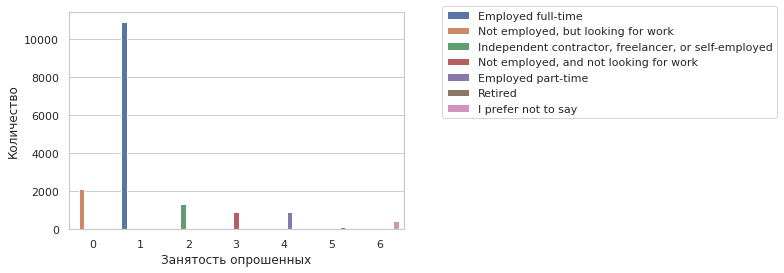

In [49]:
a = sns.countplot(x = category_data["EmploymentStatus"], hue="EmploymentStatus", data = data);
handles, labels = a.get_legend_handles_labels();
a.legend(handles=handles, labels=labels, bbox_to_anchor=(1.1, 1.05));
a.set_xlabel("Занятость опрошенных");
a.set_ylabel("Количество");

#### Мешок слов

In [51]:
pd.unique(data["HardwarePersonalProjectsSelect"])

array([nan, 'Basic laptop (Macbook)',
       'Basic laptop (Macbook),Gaming Laptop (Laptop + CUDA capable GPU)',
       'Laptop or Workstation and local IT supported servers',
       'Basic laptop (Macbook),Traditional Workstation',
       'Gaming Laptop (Laptop + CUDA capable GPU),Traditional Workstation',
       'GPU accelerated Workstation',
       'Gaming Laptop (Laptop + CUDA capable GPU)',
       'Basic laptop (Macbook),GPU accelerated Workstation,Laptop + Cloud service (AWS, Azure, GCE ...),Workstation + Cloud service',
       'Basic laptop (Macbook),Laptop + Cloud service (AWS, Azure, GCE ...)',
       'Basic laptop (Macbook),Gaming Laptop (Laptop + CUDA capable GPU),Laptop + Cloud service (AWS, Azure, GCE ...)',
       'GPU accelerated Workstation,Workstation + Cloud service',
       'Traditional Workstation',
       'Laptop + Cloud service (AWS, Azure, GCE ...)',
       'GPU accelerated Workstation,Traditional Workstation,Other',
       'Basic laptop (Macbook),GPU accelerated

In [52]:
data["HardwarePersonalProjectsSelect"].value_counts()

Basic laptop (Macbook)                                                                                                                                                              1713
Gaming Laptop (Laptop + CUDA capable GPU)                                                                                                                                            427
Laptop + Cloud service (AWS, Azure, GCE ...)                                                                                                                                         313
Traditional Workstation                                                                                                                                                              304
Laptop or Workstation and local IT supported servers                                                                                                                                 268
                                                                           

In [63]:
data["HardwarePersonalProjectsSelect"].nunique()

95

In [69]:
free_form_responses["KaggleMotivationFreeForm"].dropna()

18                                                 Curious
24                              Promote our data solutions
86                     More knowledge and funny experience
106      Keep it touch with the data science evolution ...
137        machine learning and data science is my passion
                               ...                        
16610                                            New ideas
16612    I'd be able to get datasets that I might need ...
16633    My friend told me about it and I thought it so...
16637    Learn more about what's possible, what machine...
16701                              Catch up with the trend
Name: KaggleMotivationFreeForm, Length: 746, dtype: object

In [65]:
#создадим мешок слов из столбца мотивации быть пользователем Kaggle
free_form_responses["KaggleMotivationFreeForm"].value_counts()

Curiosity                                                        14
Fun                                                              12
learning                                                         11
Learning                                                          8
hobby                                                             7
                                                                 ..
learning                                                          1
Interest in analytics, using reduction to find/solve problems     1
self-development                                                  1
Upskilling                                                        1
To make the world happier                                         1
Name: KaggleMotivationFreeForm, Length: 668, dtype: int64

In [85]:
all_words = np.concatenate(free_form_responses["KaggleMotivationFreeForm"].dropna().apply(lambda s: s.strip().split()).values)

In [86]:
len(all_words)

4859

In [77]:
import nltk

In [78]:
from nltk.corpus import stopwords

In [79]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/tanya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [83]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [96]:
words_series = pd.Series(list(all_words))
stop_words = stopwords.words("english")
stop_words += "I"
words_series[~words_series.isin(stop_words)].value_counts().head(10)


data        206
science     109
learning     98
learn        64
machine      59
Learning     40
Learn        40
Data         36
new          35
interest     33
dtype: int64

In [11]:
#создадим новую таблицу, состоящую из числовых данных
num_data = pd.DataFrame({"GenderSelect": category_data["GenderSelect"], "Age": category_data["Age"],
                         "EmploymentStatus": category_data["EmploymentStatus"]})

# нужные столбцы:
names = {
    "CodeWriter", "CareerSwitcher",
    "JobSkillImportanceBigData", "JobSkillImportanceDegree", "JobSkillImportanceStats",
    "JobSkillImportanceEnterpriseTools", "JobSkillImportancePython", "JobSkillImportanceR",
    "JobSkillImportanceSQL", "JobSkillImportanceMOOC", "JobSkillImportanceVisualizations",
    "LearningPlatformUsefulnessBlogs", "LearningPlatformUsefulnessCollege", "LearningPlatformUsefulnessCompany",
    "LearningPlatformUsefulnessConferences", "LearningPlatformUsefulnessFriends",
    "LearningPlatformUsefulnessKaggle", "LearningPlatformUsefulnessCommunities",
    "LearningPlatformUsefulnessDocumentation", "LearningPlatformUsefulnessCourses",
    "LearningPlatformUsefulnessProjects", "LearningPlatformUsefulnessPodcasts",
    "LearningPlatformUsefulnessSO", "LearningPlatformUsefulnessTextbook", "LearningPlatformUsefulnessTutoring",
    "LearningPlatformUsefulnessYouTube",
    "WorkToolsFrequencyAmazonML", "WorkToolsFrequencyAWS",
    "WorkToolsFrequencyAngoss", "WorkToolsFrequencyC", "WorkToolsFrequencyJava",
    "WorkToolsFrequencyJupyter", "WorkToolsFrequencyMATLAB", "WorkToolsFrequencyExcel",
    "WorkToolsFrequencyNoSQL", "WorkToolsFrequencyPerl", "WorkToolsFrequencyPython", "WorkToolsFrequencyR",
    "WorkToolsFrequencySQL", "WorkToolsFrequencyTensorFlow", "WorkToolsFrequencyUnix",
    "WorkMethodsFrequencyA/B", "WorkMethodsFrequencyAssociationRules", "WorkMethodsFrequencyBayesian",
    "WorkMethodsFrequencyCNNs", "WorkMethodsFrequencyCross-Validation", "WorkMethodsFrequencyCollaborativeFiltering",
    "WorkMethodsFrequencyDataVisualization", "WorkMethodsFrequencyDecisionTrees",
    "WorkMethodsFrequencyEnsembleMethods", "WorkMethodsFrequencyGANs", "WorkMethodsFrequencyGBM",
    "WorkMethodsFrequencyHMMs", "WorkMethodsFrequencyKNN", "WorkMethodsFrequencyLogisticRegression",
    "WorkMethodsFrequencyMLN", "WorkMethodsFrequencyNaiveBayes", "WorkMethodsFrequencyNLP",
    "WorkMethodsFrequencyNeuralNetworks", "WorkMethodsFrequencyPCA", "WorkMethodsFrequencyRandomForests",
    "WorkMethodsFrequencyRecommenderSystems", "WorkMethodsFrequencyRNNs", "WorkMethodsFrequencySegmentation",
    "WorkMethodsFrequencySimulation", "WorkMethodsFrequencySVMs", "WorkMethodsFrequencyTextAnalysis",
    "WorkMethodsFrequencyTimeSeriesAnalysis"
}

for i in names:
    num_data[i] = category_data[i]

In [19]:
num_data

,GenderSelect,Age,EmploymentStatus,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyRNNs,JobSkillImportanceSQL,WorkMethodsFrequencyRecommenderSystems,LearningPlatformUsefulnessCommunities,WorkToolsFrequencyNoSQL,JobSkillImportanceEnterpriseTools,...,WorkMethodsFrequencyNLP,WorkMethodsFrequencyCNNs,WorkMethodsFrequencySimulation,WorkMethodsFrequencySegmentation,LearningPlatformUsefulnessCollege,JobSkillImportanceMOOC,CareerSwitcher,WorkToolsFrequencyTensorFlow,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessPodcasts
0,NaN,NaN,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1.0,30.0,0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,28.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,0.0,56.0,2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,38.0,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,1.0,24.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,0.0,25.0,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,1.0,25.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16714,1.0,16.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
num_data1 = pd.DataFrame({"GenderSelect": category_data["GenderSelect"], "Age": category_data["Age"],
                         "EmploymentStatus": category_data["EmploymentStatus"],
                         "CodeWriter": category_data["CodeWriter"],
                         "WorkToolsFrequencyPython": category_data["WorkToolsFrequencyPython"], 
                         "LearningPlatformUsefulnessCourses": category_data["LearningPlatformUsefulnessCourses"], 
                         "LearningPlatformUsefulnessKaggle": category_data["LearningPlatformUsefulnessKaggle"]})

In [126]:
num_data1["Age"].isnull().sum()

0

In [36]:
num_data1 = num_data1.dropna(axis='index', how='any')

In [37]:
num_data1

,GenderSelect,Age,EmploymentStatus,CodeWriter,WorkToolsFrequencyPython,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessKaggle
5,0.0,46.0,1,1.0,3.0,2.0,2.0
9,0.0,33.0,1,1.0,3.0,2.0,1.0
14,0.0,26.0,1,1.0,3.0,2.0,2.0
23,0.0,21.0,4,1.0,3.0,2.0,1.0
31,0.0,29.0,1,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...
16394,0.0,32.0,4,1.0,3.0,2.0,1.0
16507,0.0,56.0,1,1.0,1.0,2.0,1.0
16517,0.0,34.0,1,1.0,3.0,2.0,1.0
16687,0.0,55.0,2,1.0,1.0,2.0,2.0


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)

In [116]:
tsne.fit(num_data1)

TSNE(random_state=0)

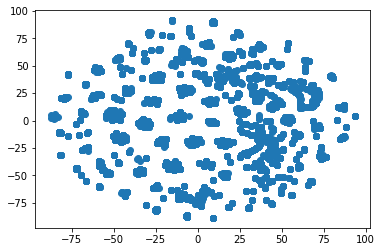

In [112]:
plt.scatter(tsne.embedding_[:, 0],tsne.embedding_[:, 1]);

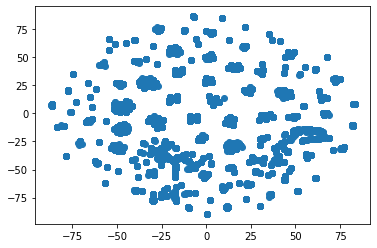

In [117]:
plt.scatter(tsne.embedding_[:, 0],tsne.embedding_[:, 1]);

In [26]:
names = {
    "CodeWriter", "CareerSwitcher",
    "JobSkillImportanceBigData", "JobSkillImportanceDegree", "JobSkillImportanceStats",
    "JobSkillImportanceEnterpriseTools", "JobSkillImportancePython", "JobSkillImportanceR",
    "JobSkillImportanceSQL", "JobSkillImportanceMOOC", "JobSkillImportanceVisualizations",
    "LearningPlatformUsefulnessBlogs", "LearningPlatformUsefulnessCollege", "LearningPlatformUsefulnessCompany",
    "LearningPlatformUsefulnessConferences", "LearningPlatformUsefulnessFriends",
    "LearningPlatformUsefulnessKaggle", "LearningPlatformUsefulnessCommunities",
    "LearningPlatformUsefulnessDocumentation", "LearningPlatformUsefulnessCourses",
    "LearningPlatformUsefulnessProjects", "LearningPlatformUsefulnessPodcasts",
    "LearningPlatformUsefulnessSO", "LearningPlatformUsefulnessTextbook", "LearningPlatformUsefulnessTutoring",
    "LearningPlatformUsefulnessYouTube",
    "WorkToolsFrequencyAmazonML", "WorkToolsFrequencyAWS",
    "WorkToolsFrequencyAngoss", "WorkToolsFrequencyC", "WorkToolsFrequencyJava",
    "WorkToolsFrequencyJupyter", "WorkToolsFrequencyMATLAB", "WorkToolsFrequencyExcel",
    "WorkToolsFrequencyNoSQL", "WorkToolsFrequencyPerl", "WorkToolsFrequencyPython", "WorkToolsFrequencyR",
    "WorkToolsFrequencySQL", "WorkToolsFrequencyTensorFlow", "WorkToolsFrequencyUnix",
    "WorkMethodsFrequencyA/B", "WorkMethodsFrequencyAssociationRules", "WorkMethodsFrequencyBayesian",
    "WorkMethodsFrequencyCNNs", "WorkMethodsFrequencyCross-Validation", "WorkMethodsFrequencyCollaborativeFiltering",
    "WorkMethodsFrequencyDataVisualization", "WorkMethodsFrequencyDecisionTrees",
    "WorkMethodsFrequencyEnsembleMethods", "WorkMethodsFrequencyGANs", "WorkMethodsFrequencyGBM",
    "WorkMethodsFrequencyHMMs", "WorkMethodsFrequencyKNN", "WorkMethodsFrequencyLogisticRegression",
    "WorkMethodsFrequencyMLN", "WorkMethodsFrequencyNaiveBayes", "WorkMethodsFrequencyNLP",
    "WorkMethodsFrequencyNeuralNetworks", "WorkMethodsFrequencyPCA", "WorkMethodsFrequencyRandomForests",
    "WorkMethodsFrequencyRecommenderSystems", "WorkMethodsFrequencyRNNs", "WorkMethodsFrequencySegmentation",
    "WorkMethodsFrequencySimulation", "WorkMethodsFrequencySVMs", "WorkMethodsFrequencyTextAnalysis",
    "WorkMethodsFrequencyTimeSeriesAnalysis"
}

for i in names:
    if num_data[i].isnull().sum() < 11000:
        print('"' + i + '", ')

"WorkToolsFrequencyPython", 
"LearningPlatformUsefulnessCourses", 
"LearningPlatformUsefulnessKaggle", 
"CodeWriter", 


In [ ]:
WorkMethodsFrequencyDataVisualization 11810
LearningPlatformUsefulnessProjects 11922
LearningPlatformUsefulnessBlogs 11951
LearningPlatformUsefulnessSO 11076
WorkToolsFrequencyPython 10726
CodeWriter 3530
LearningPlatformUsefulnessKaggle 10133
LearningPlatformUsefulnessCourses 10724
LearningPlatformUsefulnessYouTube 11487

In [14]:
num_data2 = pd.DataFrame({"GenderSelect": category_data["GenderSelect"], "Age": category_data["Age"],
                         "EmploymentStatus": category_data["EmploymentStatus"], 
                         "CodeWriter": category_data["CodeWriter"]})
names = {
    "WorkMethodsFrequencyDataVisualization", 
"LearningPlatformUsefulnessProjects", 
"LearningPlatformUsefulnessBlogs", 
"LearningPlatformUsefulnessSO", 
"WorkToolsFrequencyPython", 
"CodeWriter", 
"LearningPlatformUsefulnessKaggle", 
"LearningPlatformUsefulnessCourses", 
"LearningPlatformUsefulnessYouTube", 
}

for i in names:
    num_data2[i] = category_data[i]

In [15]:
num_data2 = num_data2.dropna(axis='index', how='any')

In [180]:
num_data2.isnull().sum()

GenderSelect                               0
Age                                        0
EmploymentStatus                           0
CodeWriter                                 0
WorkToolsFrequencyJupyter                  0
WorkMethodsFrequencyDecisionTrees          0
WorkMethodsFrequencyDataVisualization      0
LearningPlatformUsefulnessProjects         0
WorkToolsFrequencyTensorFlow               0
LearningPlatformUsefulnessDocumentation    0
WorkMethodsFrequencySegmentation           0
LearningPlatformUsefulnessBlogs            0
LearningPlatformUsefulnessSO               0
JobSkillImportanceStats                    0
WorkMethodsFrequencyLogisticRegression     0
CareerSwitcher                             0
WorkMethodsFrequencyRandomForests          0
JobSkillImportanceVisualizations           0
JobSkillImportanceBigData                  0
JobSkillImportanceMOOC                     0
WorkToolsFrequencyPython                   0
JobSkillImportanceSQL                      0
WorkMethod

In [16]:
num_data2

,GenderSelect,Age,EmploymentStatus,CodeWriter,LearningPlatformUsefulnessYouTube,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessBlogs,WorkToolsFrequencyPython,LearningPlatformUsefulnessSO,WorkMethodsFrequencyDataVisualization,LearningPlatformUsefulnessCourses
9,0.0,33.0,1,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0
37,0.0,37.0,1,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0
72,0.0,38.0,1,1.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0
99,0.0,40.0,1,1.0,1.0,0.0,1.0,1.0,1.0,2.0,3.0,2.0
165,0.0,37.0,2,1.0,1.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14223,0.0,28.0,2,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
14232,0.0,53.0,2,1.0,1.0,2.0,2.0,1.0,3.0,2.0,3.0,2.0
14703,0.0,39.0,1,1.0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,1.0
15342,0.0,42.0,1,1.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0


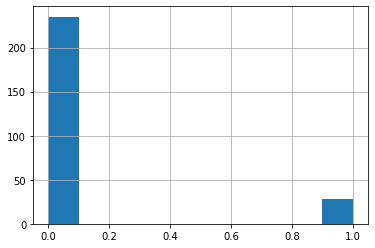

In [17]:
num_data2["GenderSelect"].hist()

In [200]:
tsne1 = TSNE(random_state=0)

In [201]:
tsne1.fit(num_data2)

TSNE(random_state=0)

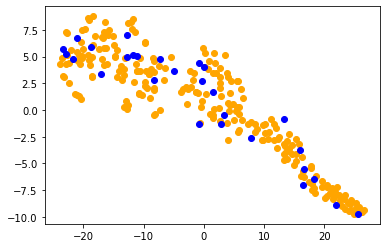

In [202]:
plt.scatter(tsne1.embedding_[num_data2["GenderSelect"].map({0: True, 1: False}).values, 0],
            tsne1.embedding_[num_data2["GenderSelect"].map({0: True, 1: False}).values, 1], color="orange");
plt.scatter(tsne1.embedding_[~num_data2["GenderSelect"].map({0: True, 1: False}).values, 0],
            tsne1.embedding_[~num_data2["GenderSelect"].map({0: True, 1: False}).values, 1], color="blue");

In [204]:
tsne1.embedding_[num_data2["GenderSelect"].map({0: True, 1: False}).values, 0].shape

(235,)

In [18]:
num_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 9 to 15415
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GenderSelect                           263 non-null    float64
 1   Age                                    263 non-null    float64
 2   EmploymentStatus                       263 non-null    int64  
 3   CodeWriter                             263 non-null    float64
 4   LearningPlatformUsefulnessYouTube      263 non-null    float64
 5   LearningPlatformUsefulnessKaggle       263 non-null    float64
 6   LearningPlatformUsefulnessProjects     263 non-null    float64
 7   LearningPlatformUsefulnessBlogs        263 non-null    float64
 8   WorkToolsFrequencyPython               263 non-null    float64
 9   LearningPlatformUsefulnessSO           263 non-null    float64
 10  WorkMethodsFrequencyDataVisualization  263 non-null    float64
 11  Lear

In [22]:
y = num_data2["EmploymentStatus"].astype("int")
X = num_data2.drop("EmploymentStatus", axis=1)

In [23]:
y.shape, X.shape

((263,), (263, 11))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [30]:
first_tree = DecisionTreeClassifier(random_state=17)

In [33]:
cross_val_score(first_tree, X_train, y_train, cv=3)

array([0.62903226, 0.72131148, 0.7704918 ])

In [34]:
num_data1

,Age,Gender_A different identity,Gender_Female,Gender_Male,"Gender_Non-binary, genderqueer, or gender non-conforming",Employment_Employed full-time,Employment_Employed part-time,Employment_I prefer not to say,"Employment_Independent contractor, freelancer, or self-employed","Employment_Not employed, and not looking for work",...,WM_RandomForests_Rarely,WM_RandomForests_Sometimes,WM_RNNs_Most of the time,WM_RNNs_Often,WM_RNNs_Rarely,WM_RNNs_Sometimes,WM_HMMs_Most of the time,WM_HMMs_Often,WM_HMMs_Rarely,WM_HMMs_Sometimes
0,30.0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56.0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,38.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,24.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16712,25.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16713,25.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16714,16.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y1 = num_data1["Employment_Employed full-time"].astype("int")
X1 = num_data1.drop(["Employment_Employed full-time", "Employment_Employed part-time",
                    "Employment_I prefer not to say", "Employment_Independent contractor, freelancer, or self-employed",
                    "Employment_Not employed, and not looking for work",
                    "Employment_Not employed, but looking for work",
                    "Employment_Retired"], axis=1)

In [65]:
y1.shape, X1.shape

((16716,), (16716, 368))

In [66]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=17)

In [67]:
second_tree = DecisionTreeClassifier(random_state=17)

In [68]:
cross_val_score(second_tree, X1_train, y1_train, cv=5)

array([0.7992311 , 0.7982906 , 0.79444444, 0.78803419, 0.78290598])

In [46]:
first_knn = KNeighborsClassifier()

In [47]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.7935435435435435

In [41]:
second_knn = KNeighborsClassifier()

In [42]:
np.mean(cross_val_score(second_knn, X1_train, y1_train, cv=5))

0.8108705097171564

## Настроим max_depth для дерева

In [69]:
tree_params = { 'max_depth': np.arange(1, 11), 'min_samples_leaf': [1, 2, 3, 4], 'max_features': [0.5, 0.7, 1]}

In [70]:
tree_grid1 = GridSearchCV(second_tree, tree_params, cv=5)

In [71]:
tree_grid1.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1],
                         'min_samples_leaf': [1, 2, 3, 4]})

In [72]:
tree_grid1.best_score_, tree_grid1.best_params_

(0.8634301215420395,
 {'max_depth': 5, 'max_features': 0.7, 'min_samples_leaf': 3})

## Настроим max_depth для метода ближайших соседей

In [50]:
knn_params = {'n_neighbors': [1, 2, 3, 4] + list(range(50, 100, 10))}

In [51]:
knn_grid1 = GridSearchCV(second_knn, knn_params, cv=5)

In [52]:
knn_grid1.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 50, 60, 70, 80, 90]})

In [53]:
knn_grid1.best_score_, knn_grid1.best_params_

(0.8173659076222082, {'n_neighbors': 50})

In [82]:
# возможно лучший параметр находится в промежутке от 4 до 50,
# которые мы не включали. Проверим это

In [55]:
knn_params = {'n_neighbors': range(5, 50)}

In [56]:
knn_grid1 = GridSearchCV(second_knn, knn_params, cv=5)

In [57]:
knn_grid1.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 50)})

In [100]:
knn_grid1.best_score_, knn_grid1.best_params_

(0.8371765399351606, {'n_neighbors': 47})

In [73]:
test_valid_pred1 = tree_grid1.predict(X1_test)

In [74]:
accuracy_score(y1_test, test_valid_pred1)

0.8514456630109671

In [77]:
export_graphviz(tree_grid1.best_estimator_, out_file='employment_status2.dot',
               feature_names=X1.columns, filled=True)

In [80]:
!dot -Tpng employment_status2.dot -o employment_status2.png

<img src='employment_status2.png'>

In [120]:
export_graphviz(tree_grid.best_estimator_, out_file='employment_status.dot',
               feature_names=X.columns, filled=True)

<img src='employment_status.png'>

In [18]:
y1 = num_data1["Employment_Employed full-time"].astype("int")
X1 = num_data1.drop(["Employment_Employed full-time", "Employment_Employed part-time",
                    "Employment_I prefer not to say", "Employment_Independent contractor, freelancer, or self-employed",
                    "Employment_Not employed, and not looking for work",
                    "Employment_Not employed, but looking for work",
                    "Employment_Retired"], axis=1)

In [20]:
X1.shape

(16716, 251)

In [21]:
# последовательность с индексами
sites_flatten = X1.values.flatten()

full_sites_sparse = csr_matrix(([1] * sites_flatten.shape[0],
                                sites_flatten,
                                range(0, sites_flatten.shape[0] + 251, 251)))[:, 1:]

In [22]:
#разряженная матрица
full_sites_sparse.shape

(16716, 100)

In [24]:
y1.shape

(16716,)

## Логистическая регрессия

In [26]:
X_train, X_test, y_train, y_test = train_test_split(full_sites_sparse, y1, test_size=0.33, random_state=42)

In [42]:
logit = LogisticRegression(C=1, n_jobs=-1, random_state=17)

In [43]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=17)

In [44]:
valid_pred = logit.predict_proba(X_test)[:, 1]

In [45]:
roc_auc_score(y_test, valid_pred)

0.7117261363466096

In [56]:
new_logit = LogisticRegression(n_jobs=-1, random_state=17)

In [57]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=17)

In [58]:
new_logit.fit(X1_train, y1_train)

LogisticRegression(n_jobs=-1, random_state=17)

In [59]:
X1_test.shape, X1_train.shape, y1_train.shape, y1_test.shape

((5015, 251), (11701, 251), (11701,), (5015,))

In [63]:
valid_pred1 = new_logit.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, valid_pred1)

0.8257402315368481

In [78]:
#создание посылки для кегл
pd.Series(valid_pred1, index=range(1, valid_pred1.shape[0] + 1),
          name='employment').to_csv('benchmark.csv', header=True, index_label="user_id")

In [79]:
!head benchmark.csv

user_id,employment
1,0.9143320769773898
2,0.6908630652998556
3,0.8522982358634015
4,0.7966572840707762
5,0.03417978003184241
6,0.9022585842457626
7,0.884184997748235
8,0.7922044039021899
9,0.7697199183996392
